## Group-6 Project PML
## Hand written Digit recogonition using Neural Network

#### Team Members
#### Vishnu Radhakrishnan - [CB.EN.U4AIE20074]
#### Visweswaran M - [CB.EN.U4AIE20075]
#### Menta Sai Akshay - [CB.EN.U4AIE20040]
#### Krishnan KM - [CB.EN.U4AIE20031]
#### Thushit Kumar R - [CB.EN.U4AIE20072]

In [5]:
import numpy as np


def neural_network(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb):
    # Weights are split back to Theta1, Theta2
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, input_layer_size + 1))
    Theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):],
                        (num_labels, hidden_layer_size + 1))

    # Forward propagation
    m = X.shape[0]
    one_matrix = np.ones((m, 1))
    X = np.append(one_matrix, X, axis=1) # Adding bias unit to first layer
    a1 = X
    z2 = np.dot(X, Theta1.transpose())
    a2 = 1 / (1 + np.exp(-z2)) # Activation for second layer
    one_matrix = np.ones((m, 1))
    a2 = np.append(one_matrix, a2, axis=1) # Adding bias unit to hidden layer
    z3 = np.dot(a2, Theta2.transpose())
    a3 = 1 / (1 + np.exp(-z3)) # Activation for third layer

    # Changing the y labels into vectors of boolean values.
    # For each label between 0 and 9, there will be a vector of length 10
    # where the ith element will be 1 if the label equals i
    y_vect = np.zeros((m, 10))
    for i in range(m):
        y_vect[i, int(y[i])] = 1

    # Calculating cost function
    J = (1 / m) * (np.sum(np.sum(-y_vect * np.log(a3) - (1 - y_vect) * np.log(1 - a3)))) + (lamb / (2 * m)) * (
                sum(sum(pow(Theta1[:, 1:], 2))) + sum(sum(pow(Theta2[:, 1:], 2))))

    # backprop
    Delta3 = a3 - y_vect
    Delta2 = np.dot(Delta3, Theta2) * a2 * (1 - a2)
    Delta2 = Delta2[:, 1:]

    #gradient
    Theta1[:, 0] = 0
    Theta1_grad = (1 / m) * np.dot(Delta2.transpose(), a1) + (lamb / m) * Theta1
    Theta2[:, 0] = 0
    Theta2_grad = (1 / m) * np.dot(Delta3.transpose(), a2) + (lamb / m) * Theta2
    grad = np.concatenate((Theta1_grad.flatten(), Theta2_grad.flatten()))

    return J, grad


In [6]:
import numpy as np
  # Randomly initialises values of thetas between [-epsilon, +epsilon]
def initialise(a, b):
    epsilon = 0.15
    c = np.random.rand(a, b + 1) * (2 * epsilon) - epsilon
    return c

In [7]:
import numpy as np


def predict(Theta1, Theta2, X):
    m = X.shape[0]
    one_matrix = np.ones((m, 1))
    X = np.append(one_matrix, X, axis=1) # Adding bias unit to first layer
    z2 = np.dot(X, Theta1.transpose())
    a2 = 1 / (1 + np.exp(-z2)) # Activation for second layer
    one_matrix = np.ones((m, 1))
    a2 = np.append(one_matrix, a2, axis=1) # Adding bias unit to hidden layer
    z3 = np.dot(a2, Theta2.transpose())
    a3 = 1 / (1 + np.exp(-z3)) # Activation for third layer
    p = (np.argmax(a3, axis=1)) # Predicting the class on the basis of max value of hypothesis
    return p

In [8]:
from scipy.io import loadmat
import numpy as np
from scipy.optimize import minimize


# Loading mat file
data = loadmat('mnist-original.mat')

# Extracting features from mat file
X = data['data']
X = X.transpose()

# Normalizing the data
X = X / 255

# Extracting labels from mat file
y = data['label']
y = y.flatten()

# Splitting data into training set with 60,000 examples
X_train = X[:60000, :]
y_train = y[:60000]

# Splitting data into testing set with 10,000 examples
X_test = X[60000:, :]
y_test = y[60000:]

m = X.shape[0]
input_layer_size = 784 # Images are of (28 X 28) px so there will be 784 features
hidden_layer_size = 100
num_labels = 10 # There are 10 classes [0, 9]

# Randomly initialising Thetas
initial_Theta1 = initialise(hidden_layer_size, input_layer_size)
initial_Theta2 = initialise(num_labels, hidden_layer_size)

# Unrolling parameters into a single column vector
initial_nn_params = np.concatenate((initial_Theta1.flatten(), initial_Theta2.flatten()))
maxiter = 100
lambda_reg = 0.1 # To avoid overfitting
myargs = (input_layer_size, hidden_layer_size, num_labels, X_train, y_train, lambda_reg)

# Calling minimize function to minimize cost function and to train weights
results = minimize(neural_network, x0=initial_nn_params, args=myargs,
        options={'disp': True, 'maxiter': maxiter}, method="L-BFGS-B", jac=True)

nn_params = results["x"] # Trained Theta is extracted

# Weights are split back to Theta1, Theta2
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)], (
                            hidden_layer_size, input_layer_size + 1)) # shape = (100, 785)
Theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):],
                    (num_labels, hidden_layer_size + 1)) # shape = (10, 101)

# Checking test set accuracy of our model
pred = predict(Theta1, Theta2, X_test)
print('Test Set Accuracy: {:f}'.format((np.mean(pred == y_test) * 100)))

# Checking train set accuracy of our model
pred = predict(Theta1, Theta2, X_train)
print('Training Set Accuracy: {:f}'.format((np.mean(pred == y_train) * 100)))

# Evaluating precision of our model
true_positive = 0
for i in range(len(pred)):
    if pred[i] == y_train[i]:
        true_positive += 1
false_positive = len(y_train) - true_positive
print('Precision =', true_positive/(true_positive + false_positive))

# Saving Thetas in .txt file
np.savetxt('Theta1.txt', Theta1, delimiter=' ')
np.savetxt('Theta2.txt', Theta2, delimiter=' ')


Test Set Accuracy: 97.420000
Training Set Accuracy: 99.405000
Precision = 0.99405


In [23]:
from tkinter import *
import numpy as np
from PIL import ImageGrab
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
window = Tk()
window.title("Handwritten digit recognition")
l1 = Label()


def MyProject():
    global l1

    widget = cv
    # Setting co-ordinates of canvas
    x = window.winfo_rootx() + widget.winfo_x()
    y = window.winfo_rooty() + widget.winfo_y()
    x1 = x + widget.winfo_width()
    y1 = y + widget.winfo_height()

    # Image is captured from canvas and is resized to (28 X 28) px
    img = ImageGrab.grab().crop((x, y, x1, y1)).resize((28, 28))
    
    # Converting rgb to grayscale image
    img = img.convert('L')

    # Extracting pixel matrix of image and converting it to a vector of (1, 784)
    x = np.asarray(img)
    vec = np.zeros((1, 784))
    k = 0
    for i in range(28):
        for j in range(28):
            vec[0][k] = x[i][j]
            k += 1

    # Loading Thetas
    Theta1 = np.loadtxt('Theta1.txt')
    Theta2 = np.loadtxt('Theta2.txt')
    
    # Calling function for prediction
    pred = predict(Theta1, Theta2, vec / 255)

    # Displaying the result
    l1 = Label(window, text="Digit = " + str(pred[0]), font=('Algerian', 20))
    l1.place(x=230, y=420)


lastx, lasty = None, None


# Clears the canvas
def clear_widget():
    global cv, l1
    cv.delete("all")
    l1.destroy()


# Activate canvas
def event_activation(event):
    global lastx, lasty
    cv.bind('<B1-Motion>', draw_lines)
    lastx, lasty = event.x, event.y


# To draw on canvas
def draw_lines(event):
    global lastx, lasty
    x, y = event.x, event.y
    cv.create_line((lastx, lasty, x, y), width=30, fill='white', capstyle=ROUND, smooth=TRUE, splinesteps=12)
    lastx, lasty = x, y


# Label
L1 = Label(window, text="Handwritten Digit Recoginition", font=('Algerian', 25), fg="blue")
L1.place(x=35, y=10)

# Button to clear canvas
b1 = Button(window, text="1. Clear Canvas", font=('Algerian', 15), bg="orange", fg="black", command=clear_widget)
b1.place(x=120, y=370)

# Button to predict digit drawn on canvas
b2 = Button(window, text="2. Prediction", font=('Algerian', 15), bg="white", fg="red", command=MyProject)
b2.place(x=320, y=370)

# Setting properties of canvas
cv = Canvas(window, width=350, height=290, bg='black')
cv.place(x=120, y=70)

cv.bind('<Button-1>', event_activation)
window.geometry("600x500")
window.mainloop()


### We are taking the number using image index and prdicting manually without GUI 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

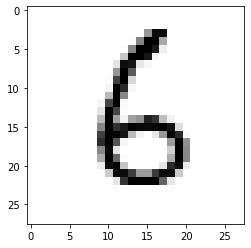

In [17]:
image_index = 5910
plt.imshow(x_train[image_index], cmap='Greys')
a=x_test[image_index].reshape(28, 28)
x = np.asarray(a)

In [18]:
vec = np.zeros((1, 784))
k = 0
for i in range(28):
    for j in range(28):
        vec[0][k] = x[i][j]
        k += 1
# Loading Thetas
Theta1 = np.loadtxt('Theta1.txt')
Theta2 = np.loadtxt('Theta2.txt')
pred = predict(Theta1, Theta2,vec/255)
print(f"predicted no is {pred}")

predicted no is [5]
